In [1]:
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
import seaborn as sns

### Data Acquisition

In [2]:
# data=pd.read_csv('btc.csv')
test_data = pd.read_csv('BTC_USDT_Historical_Data.csv')
test_data = test_data.loc["2022-02-01":].copy()
data=test_data

### Data Preprocessing

In [3]:
data = pd.read_csv('BTC_USDT_Historical_Data.csv')
data.set_index('Date', inplace=True)
data = data.loc["2022-02-01":].copy()
new_column_names = {'Open': 'open',
                    'High': 'high',
                    'Low': 'low',
                    'Close': 'close',
                    'Volume': 'volume'}
data.rename(columns=new_column_names, inplace=True)
data.rename_axis(index='datetime', inplace=True)
data = data.drop(columns='Adj Close')
data

,open,high,low,close,volume
datetime,,,,,
2022-02-01,38481.765625,39115.132812,38113.664062,38743.273438,20288500328
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,19155189416
2022-02-03,36944.804688,37154.601562,36375.539062,37154.601562,18591534769
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,29412210792
2022-02-05,41501.480469,41847.164062,41038.097656,41441.164062,19652846215
...,...,...,...,...,...
2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,16397498810
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536


In [4]:
# Display the first few rows of the dataset
print("Head of the Dataset:")
print(data.head())

Head of the Dataset:
                    open          high           low         close  \
datetime                                                             
2022-02-01  38481.765625  39115.132812  38113.664062  38743.273438   
2022-02-02  38743.714844  38834.617188  36832.730469  36952.984375   
2022-02-03  36944.804688  37154.601562  36375.539062  37154.601562   
2022-02-04  37149.265625  41527.785156  37093.628906  41500.875000   
2022-02-05  41501.480469  41847.164062  41038.097656  41441.164062   

                 volume  
datetime                 
2022-02-01  20288500328  
2022-02-02  19155189416  
2022-02-03  18591534769  
2022-02-04  29412210792  
2022-02-05  19652846215  


In [5]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
               open          high           low         close        volume
count    703.000000    703.000000    703.000000    703.000000  7.030000e+02
mean   28055.254795  28559.249972  27550.229257  28060.753459  2.394173e+10
std     8097.311614   8267.928078   7932.831723   8105.329101  1.218456e+10
min    15782.300781  16253.047852  15599.046875  15787.284180  5.331173e+09
25%    21264.613281  21714.560547  20819.321289  21261.222656  1.491611e+10
50%    27035.470703  27414.734375  26681.605469  27036.650391  2.245277e+10
75%    31230.620117  31953.458008  30312.448242  31230.776367  3.018116e+10
max    47456.898438  48086.835938  47100.437500  47465.730469  1.189925e+11


In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [7]:
# Data types
print("\nData Types:")
print(data.dtypes)


Data Types:
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


In [8]:
# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)


Correlation Matrix:
            open      high       low     close    volume
open    1.000000  0.997431  0.997112  0.994577 -0.089975
high    0.997431  1.000000  0.996131  0.997710 -0.065370
low     0.997112  0.996131  1.000000  0.997504 -0.123772
close   0.994577  0.997710  0.997504  1.000000 -0.096214
volume -0.089975 -0.065370 -0.123772 -0.096214  1.000000


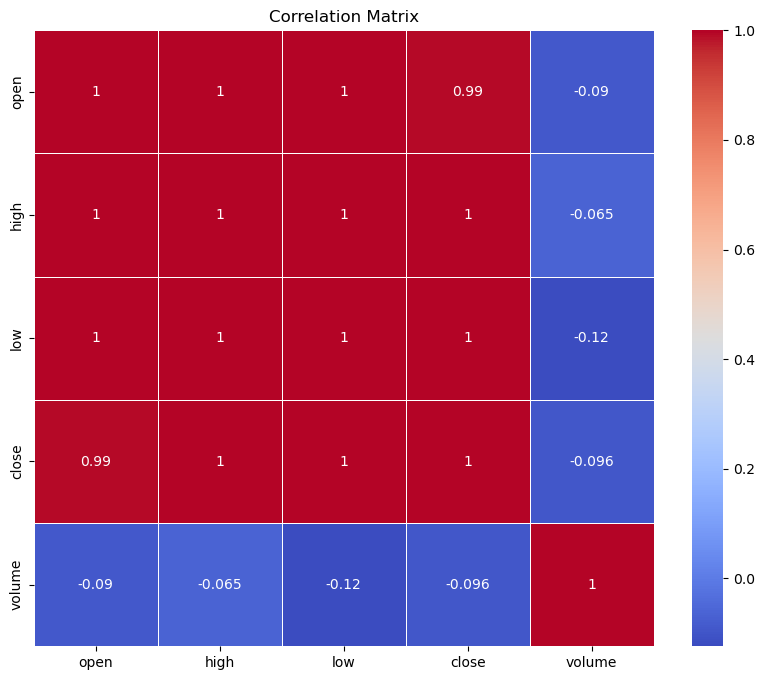

In [9]:
# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
# plt.tight_layout()
plt.show()

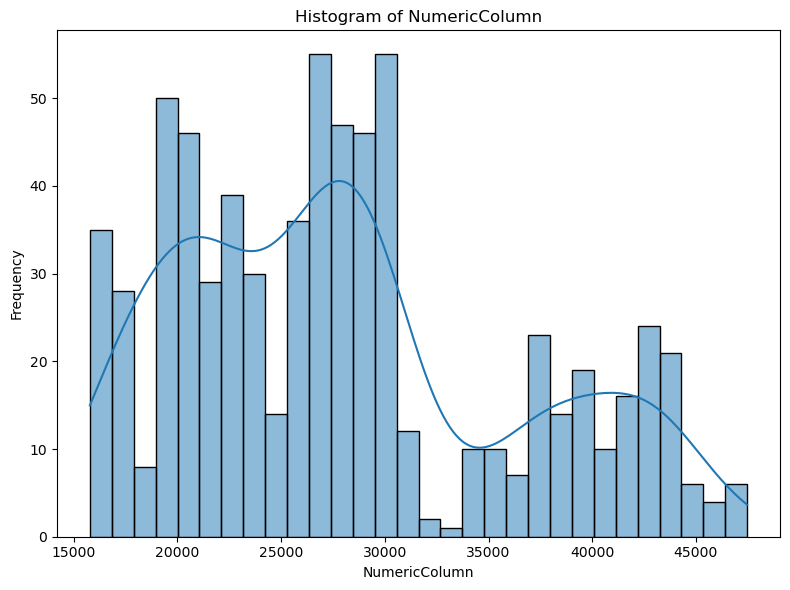

In [10]:
# Histogram for a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data['close'], bins=30, kde=True)
plt.title('Histogram of NumericColumn')
plt.xlabel('NumericColumn')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\SOMESH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\SOMESH\AppData\Local\Temp\ipykernel_22652\3540190117.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


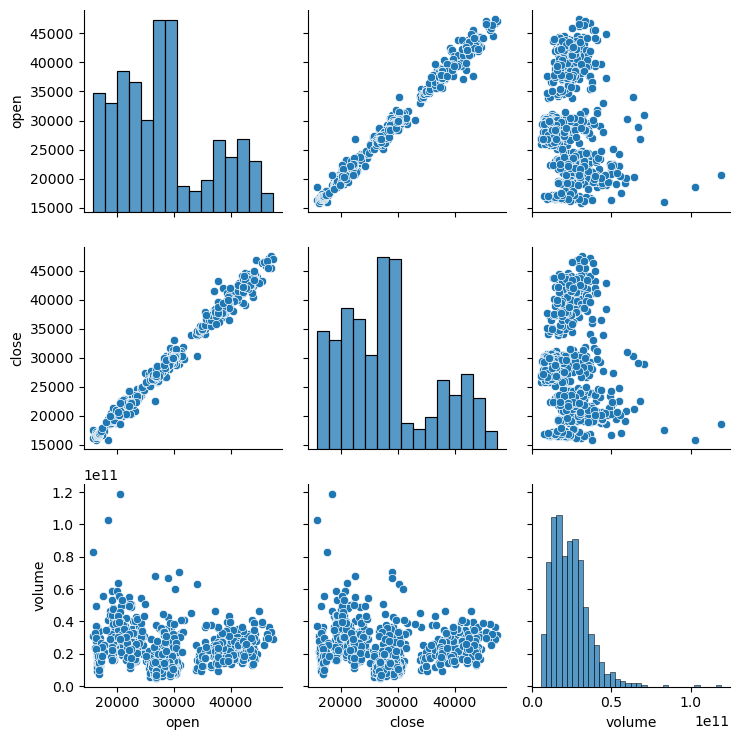

In [11]:
# Pairplot for multiple numerical columns
sns.pairplot(data[['open', 'close', 'volume']])
plt.tight_layout()
plt.show()

### Model Design

In [12]:
# Calculate MACD with custom periods
data['macd'] = ta.trend.macd(data['close'], window_slow=26, window_fast=12, fillna=False)

# Calculate the signal line (26-day EMA of MACD)
data['signal'] = ta.trend.ema_indicator(data['macd'], window=9, fillna=False)

# Calculate the MACD histogram
data['histogram'] = data['macd'] - data['signal']

# Calculate the 200-day EMA
data['ema_200'] = ta.trend.ema_indicator(data['close'], window=200, fillna=False)

# Generate buy/sell signals
data['position'] = 0
data.loc[(data['macd'] > data['signal']) & (data['histogram'] > 0) & (data['close'] > data['ema_200']), 'position'] = 1
data.loc[(data['macd'] < data['signal']) & (data['histogram'] < 0), 'position'] = -1

### Risk Management

In [13]:
# Set stop loss and profit target
stop_loss = 0.985  # 1.5% below 200-day EMA
profit_target = 1.015  # 1.5% above entry price

# Apply stop loss and profit target
data['stop_loss'] = data['ema_200'] * stop_loss
data['profit_target'] = data['close'] * profit_target

# Display the signals and relevant columns
print(data[['close', 'macd', 'signal', 'histogram', 'ema_200', 'position', 'stop_loss', 'profit_target']])

                   close        macd      signal   histogram       ema_200  \
datetime                                                                     
2022-02-01  38743.273438         NaN         NaN         NaN           NaN   
2022-02-02  36952.984375         NaN         NaN         NaN           NaN   
2022-02-03  37154.601562         NaN         NaN         NaN           NaN   
2022-02-04  41500.875000         NaN         NaN         NaN           NaN   
2022-02-05  41441.164062         NaN         NaN         NaN           NaN   
...                  ...         ...         ...         ...           ...   
2023-12-31  42265.187500  518.808594  844.398716 -325.590122  33397.408465   
2024-01-01  44167.332031  599.951743  795.509321 -195.557579  33504.571884   
2024-01-02  44957.968750  719.759113  780.359280  -60.600166  33618.536032   
2024-01-03  42848.175781  637.120331  751.711490 -114.591159  33710.373243   
2024-01-05  43404.441406  609.488681  723.266928 -113.778247  33

### Plotting the macd and signal line, histogram and 200-day ema charts for visualisation

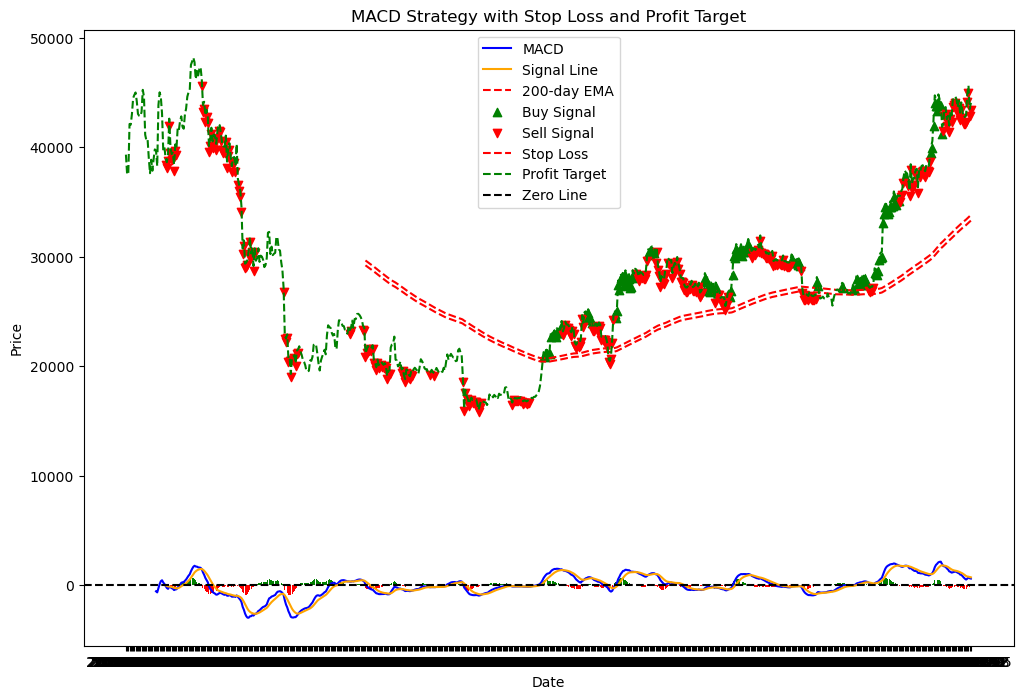

In [14]:
# Plot the data for visualization
plt.figure(figsize=(12, 8))

# Plot MACD and Signal line
plt.plot(data.index, data['macd'], label='MACD', color='blue')
plt.plot(data.index, data['signal'], label='Signal Line', color='orange')

# Plot Histogram
plt.bar(data.index, data['histogram'], color=data['histogram'].apply(lambda x: 'green' if x > 0 else 'red'))

# Plot 200-day EMA
plt.plot(data.index, data['ema_200'], label='200-day EMA', color='red', linestyle='--')

# Plot Buy and Sell signals
plt.scatter(data.index[data['position'] == 1], data['close'][data['position'] == 1], marker='^', color='g', label='Buy Signal')
plt.scatter(data.index[data['position'] == -1], data['close'][data['position'] == -1], marker='v', color='r', label='Sell Signal')

# Plot Stop Loss and Profit Target levels
plt.plot(data.index, data['stop_loss'], label='Stop Loss', linestyle='--', color='red')
plt.plot(data.index, data['profit_target'], label='Profit Target', linestyle='--', color='green')

# Plot Zero line
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')

plt.title('MACD Strategy with Stop Loss and Profit Target')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('plot.png')
plt.show()

In [15]:
# plt.savefig('macd_strategy_plot.pdf', bbox_inches='tight', format='pdf')

### Backtesting

In [16]:
initial_capital = 100000
capital = initial_capital
position_size = 0

# Simulate strategy execution
for index, row in data.iterrows():
    if row['position'] == 1 and position_size == 0:
        # Buy condition: MACD crossover, histogram is green, close above 200-day EMA
        position_size = capital // row['close']  # Buy as many shares as possible
        capital -= position_size * row['close']  # Reduce available capital

    elif row['position'] == -1 and position_size > 0:
        # Sell condition: MACD crossover, histogram is red
        capital += position_size * row['close']  # Sell all shares
        position_size = 0  # Reset position size

# Calculate final portfolio value
final_portfolio_value = capital + position_size * data['close'].iloc[-1]

# Calculate profit/loss
profit_loss = final_portfolio_value - initial_capital

print("Initial Capital: $100,000")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Profit/Loss: ${profit_loss:.2f}")


Initial Capital: $100,000
Final Portfolio Value: $135235.15
Profit/Loss: $35235.15


In [17]:
data['position'].value_counts()
# 1 -> Buy
# 0 -> Hold
# -1 -> Sell

position
-1    329
 0    241
 1    133
Name: count, dtype: int64

In [18]:
# data.head()
data.tail()

,open,high,low,close,volume,macd,signal,histogram,ema_200,position,stop_loss,profit_target
datetime,,,,,,,,,,,,
2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,16397498810,518.808594,844.398716,-325.590122,33397.408465,-1,32896.447338,42899.165312
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443,599.951743,795.509321,-195.557579,33504.571884,-1,33002.003306,44829.842012
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536,719.759113,780.359280,-60.600166,33618.536032,-1,33114.257991,45632.338281
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118,637.120331,751.711490,-114.591159,33710.373243,-1,33204.717645,43490.898418
2024-01-05,44192.980469,44269.519531,43225.183594,43404.441406,34475909120,609.488681,723.266928,-113.778247,33806.831633,-1,33299.729158,44055.508027


## Performance Metrics

In [19]:
transaction_cost_rate = 0.0015  # 0.15% per transaction
initial_capital=100000
capital = initial_capital
position_size = 0
total_transaction_cost = 0
previous_capital=0
trade_profit=0
trade_loss=0
gross_profit=0
gross_loss=0

for index, row in data.iterrows():
    if row['position'] == 1 and position_size == 0:
        previous_capital=capital
        # Buy condition
        position_size = capital // row['close']
        capital -= position_size * row['close']
        total_transaction_cost += position_size * row['close'] * transaction_cost_rate  # Transaction cost on buying

    elif row['position'] == -1 and position_size > 0:
        
        
        # Sell condition
        capital += position_size * row['close']
        total_transaction_cost += position_size * row['close'] * transaction_cost_rate  # Transaction cost on selling
        position_size = 0
        if previous_capital>capital:
            trade_loss=previous_capital-capital
            gross_loss+=trade_loss
        else:
            trade_profit=capital-previous_capital
            gross_profit+=trade_profit
    
if position_size > 0:
    # Close the position at the last closing price

    capital += position_size * data['close'].iloc[-1]
    total_transaction_cost += position_size * data['close'].iloc[-1] * transaction_cost_rate
    if previous_capital > capital:
        trade_loss = previous_capital - capital
        gross_loss += trade_loss
    else:
        trade_profit = capital - previous_capital
        gross_profit += trade_profit

final_portfolio_value = capital      

net_profit = gross_profit - gross_loss - total_transaction_cost

# Display results
print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Total Transaction Cost: ${total_transaction_cost:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Gross Profit: ${gross_profit:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Gross Loss: ${gross_loss:.2f}")

Initial Capital: $100000.00
Total Transaction Cost: $3773.54
Final Portfolio Value: $135235.15
Gross Profit: $61185.24
Net Profit: $31461.61
Gross Loss: $25950.08


In [20]:
percentage_return = (net_profit/initial_capital)
print(f"Percentage Return: {percentage_return:.2%}")

Percentage Return: 31.46%


In [21]:
percentage_return

0.314616121171875

In [22]:
# Define benchmark return (replace with actual benchmark return)
benchmark_return = 0.05  # Example: 5% benchmark return

# Calculate Daily Returns
data['daily_return'] = data['close'].pct_change()

# Calculate Cumulative Returns
data['cumulative_return'] = (1 + data['daily_return']).cumprod()

# Calculate Drawdowns
data['peak'] = data['cumulative_return'].cummax()
data['drawdown'] = (data['peak'] - data['cumulative_return']) / data['peak']

# Maximum Drawdown
max_drawdown = data['drawdown'].max()

# Buy and Hold Return
buy_and_hold_return = (data['close'].iloc[-1] / data['close'].iloc[0])-1

# Calculate Annualized Returns
annualized_return = (final_portfolio_value / initial_capital) ** (252 / len(data.index)) - 1  # Assuming 252 trading days in a year

# Calculate Annualized Volatility
annualized_volatility = data['daily_return'].std() * np.sqrt(252)

# Sharpe Ratio
sharpe_ratio = (annualized_return - 0.02) / annualized_volatility  # Assuming risk-free rate of 2%

# Calculate Downside Deviation (used for Sortino Ratio)
downside_returns = data['daily_return'][data['daily_return'] < 0]
downside_deviation = np.sqrt((downside_returns ** 2).mean())

# Sortino Ratio
sortino_ratio = (annualized_return - 0.02) / downside_deviation  # Assuming risk-free rate of 2%

# Display results
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")


Max Drawdown: 66.74%
Buy and Hold Return: 12.03%
Sharpe Ratio: 0.2066
Sortino Ratio: 3.4037


In [23]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data

,open,high,low,close,volume,macd,signal,histogram,ema_200,position,stop_loss,profit_target,daily_return,cumulative_return,peak,drawdown
datetime,,,,,,,,,,,,,,,,
2022-02-01,38481.765625,39115.132812,38113.664062,38743.273438,20288500328,NaN,NaN,NaN,NaN,0,NaN,39324.422539,NaN,NaN,NaN,NaN
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,19155189416,NaN,NaN,NaN,NaN,0,NaN,37507.279141,-0.046209,0.953791,0.953791,0.000000
2022-02-03,36944.804688,37154.601562,36375.539062,37154.601562,18591534769,NaN,NaN,NaN,NaN,0,NaN,37711.920586,0.005456,0.958995,0.958995,0.000000
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,29412210792,NaN,NaN,NaN,NaN,0,NaN,42123.388125,0.116978,1.071176,1.071176,0.000000
2022-02-05,41501.480469,41847.164062,41038.097656,41441.164062,19652846215,NaN,NaN,NaN,NaN,0,NaN,42062.781523,-0.001439,1.069635,1.071176,0.001439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,16397498810,518.808594,844.398716,-325.590122,33397.408465,-1,32896.447338,42899.165312,0.002569,1.090904,1.225135,0.109564
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443,599.951743,795.509321,-195.557579,33504.571884,-1,33002.003306,44829.842012,0.045005,1.140000,1.225135,0.069490
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536,719.759113,780.359280,-60.600166,33618.536032,-1,33114.257991,45632.338281,0.017901,1.160407,1.225135,0.052833


In [24]:
from datetime import datetime

In [25]:
transaction_cost_rate = 0.0015  # 0.15% per transaction
# data['transaction_cost'] = 0
initial_capital=100000
capital = initial_capital
position_size = 0
total_transaction_cost = 0
previous_capital=0
trade_profit=0
trade_loss=0
gross_profit=0
gross_loss=0

total_closed_trades = 0
num_winning_trades = 0
num_losing_trades = 0
total_winning_trade_value = 0
total_losing_trade_value = 0
largest_winning_trade = 0
largest_losing_trade = 0
total_holding_duration = 0
max_dip_percentage = 0
trade_start_time = None
trade_end_time = None


individual_trade_values = []
individual_trade_durations = []

trade_start_end_times = []
trade_dip_percentages = []


for index, row in data.iterrows():
    if row['position'] == 1 and position_size == 0:
        previous_capital=capital
        # Buy condition
        trade_start_time=index
        position_size = capital // row['close']
        capital -= position_size * row['close']
        total_transaction_cost += position_size * row['close'] * transaction_cost_rate  # Transaction cost on buying

    elif row['position'] == -1 and position_size > 0:
        
        # Sell condition
        trade_end_time=index
        individual_trade_durations.append(trade_end_time-trade_start_time)

        total_closed_trades+=1;
        capital += position_size * row['close']
        total_transaction_cost += position_size * row['close'] * transaction_cost_rate  # Transaction cost on selling
        position_size = 0
        
        # Calculate dip percentage during the trade
        entry_price = data['close'].loc[trade_start_time]
        lowest_price = data['low'].loc[trade_start_time:trade_end_time].min()
        dip_percentage = ((lowest_price - entry_price) / entry_price) * 100

        # Store trade start and end times, and dip percentage
        trade_start_end_times.append((trade_start_time, trade_end_time))
        trade_dip_percentages.append(dip_percentage)
        

        
        if previous_capital>capital:
            num_losing_trades+=1;
            trade_loss=previous_capital-capital
            largest_losing_trade=max(largest_losing_trade,trade_loss)
            gross_loss+=trade_loss
        else:
            if previous_capital<capital:
                num_winning_trades+=1;
            trade_profit=capital-previous_capital
            largest_winning_trade=max(largest_winning_trade,trade_profit)
            gross_profit+=trade_profit
    
if position_size > 0:
    # Close the position at the last closing price
    trade_end_time=index
    individual_trade_durations.append(trade_end_time-trade_start_time)
    
    total_closed_trades+=1;
    capital += position_size * data['close'].iloc[-1]
    total_transaction_cost += position_size * data['close'].iloc[-1] * transaction_cost_rate
    
    # Calculate dip percentage during the trade
    entry_price = data['close'].loc[trade_start_time]
    lowest_price = data['low'].loc[trade_start_time:trade_end_time].min()
    dip_percentage = ((lowest_price - entry_price) / entry_price) * 100

    # Store trade start and end times, and dip percentage
    trade_start_end_times.append((trade_start_time, trade_end_time))
    trade_dip_percentages.append(dip_percentage)
    
    
    if previous_capital > capital:
        num_losing_trades+=1;
        trade_loss = previous_capital - capital
        largest_losing_trade=max(largest_losing_trade,trade_loss)
        gross_loss += trade_loss
    else:
        if previous_capital<capital:
                num_winning_trades+=1;
        trade_profit = capital - previous_capital
        largest_winning_trade=max(largest_winning_trade,trade_profit)
        gross_profit += trade_profit

final_portfolio_value = capital      

net_profit = gross_profit - gross_loss - total_transaction_cost

average_winning_trade = gross_profit/ num_winning_trades if num_winning_trades > 0 else 0
average_losing_trade = gross_loss / num_losing_trades if num_losing_trades > 0 else 0

max_holding_duration=max(individual_trade_durations)
avg_holding_duration = sum(individual_trade_durations, pd.Timedelta(0)) / len(individual_trade_durations) if individual_trade_durations else pd.Timedelta(0)

# Display results
print(f"Total Closed Trades: {total_closed_trades}")
print(f"Number of Winning Trades: {num_winning_trades}")
print(f"Number of Losing Trades: {num_losing_trades}")
print(f"Average Winning Trade (in USDT): ${average_winning_trade:.2f}")
print(f"Average Losing Trade (in USDT): ${average_losing_trade:.2f}")
print(f"Largest Winning Trade (in USDT): ${largest_winning_trade:.2f}")
print(f"Largest Losing Trade (in USDT): ${largest_losing_trade:.2f}")

Total Closed Trades: 12
Number of Winning Trades: 5
Number of Losing Trades: 7
Average Winning Trade (in USDT): $12237.05
Average Losing Trade (in USDT): $3707.15
Largest Winning Trade (in USDT): $19553.71
Largest Losing Trade (in USDT): $5469.90


In [26]:
# Calculate average holding duration per trade
avg_holding_duration = sum(individual_trade_durations, pd.Timedelta(0)) / len(individual_trade_durations) if individual_trade_durations else pd.Timedelta(0)

# Extract days, hours, minutes, and seconds
days = avg_holding_duration.days
hours, remainder = divmod(avg_holding_duration.seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# Display results
print(f"Average Holding Duration per Trade: {days} days {hours} hours {minutes} minutes {seconds} seconds")

Average Holding Duration per Trade: 13 days 10 hours 0 minutes 0 seconds


In [27]:
# Find max and average dip percentages
max_dip_percentage = min(trade_dip_percentages) if trade_dip_percentages else 0
average_dip_percentage = sum(trade_dip_percentages) / len(trade_dip_percentages) if trade_dip_percentages else 0

In [28]:
print(f"Max Dip Percentage in a Trade: {max_dip_percentage:.2f}%")
print(f"Average Dip Percentage in Trades: {average_dip_percentage:.2f}%")

Max Dip Percentage in a Trade: -10.09%
Average Dip Percentage in Trades: -4.51%


In [29]:
win_rate = (num_winning_trades/(num_winning_trades+num_losing_trades))

In [30]:
# Display results - mentioned in Problem Statement
print(f"Gross Profit: ${gross_profit:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Total Closed Trades: {total_closed_trades}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Gross Loss: ${gross_loss:.2f}")
print(f"Average Winning Trade (in USDT): ${average_winning_trade:.2f}")
print(f"Average Losing Trade (in USDT): ${average_losing_trade:.2f}")
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")
print(f"Largest Losing Trade (in USDT): ${largest_losing_trade:.2f}")
print(f"Largest Winning Trade (in USDT): ${largest_winning_trade:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Average Holding Duration per Trade: {days} days {hours} hours {minutes} minutes {seconds} seconds")
print(f"Max Dip Percentage in a Trade: {max_dip_percentage:.2f}%")
print(f"Average Dip Percentage in Trades: {average_dip_percentage:.2f}%")

Gross Profit: $61185.24
Net Profit: $31461.61
Total Closed Trades: 12
Win Rate: 41.67%
Max Drawdown: 66.74%
Gross Loss: $25950.08
Average Winning Trade (in USDT): $12237.05
Average Losing Trade (in USDT): $3707.15
Buy and Hold Return: 12.03%
Largest Losing Trade (in USDT): $5469.90
Largest Winning Trade (in USDT): $19553.71
Sharpe Ratio: 0.2066
Sortino Ratio: 3.4037
Average Holding Duration per Trade: 13 days 10 hours 0 minutes 0 seconds
Max Dip Percentage in a Trade: -10.09%
Average Dip Percentage in Trades: -4.51%


In [31]:
# Some extra results found upon backtesting
print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Total Transaction Cost: ${total_transaction_cost:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Percentage Return: {percentage_return:.2%}")
print(f"Number of Winning Trades: {num_winning_trades}")
print(f"Number of Losing Trades: {num_losing_trades}")

Initial Capital: $100000.00
Total Transaction Cost: $3773.54
Final Portfolio Value: $135235.15
Percentage Return: 31.46%
Number of Winning Trades: 5
Number of Losing Trades: 7


MACD performed well than other methods. Here are some possible reasons:

Strength in Trend Identification:
MACD is effective in identifying the strength and direction of a trend. Traders use the MACD to determine whether an asset is in an uptrend or downtrend, helping them make informed decisions.

Crossover Signals:
MACD generates buy and sell signals through crossovers between the MACD line and the signal line. A bullish crossover (MACD crossing above the signal line) suggests a potential buying opportunity, while a bearish crossover (MACD crossing below the signal line) indicates a potential selling opportunity.

Histogram for Momentum Confirmation:
The MACD histogram represents the difference between the MACD line and the signal line. Positive histogram values indicate bullish momentum, while negative values suggest bearish momentum. Traders use this information to confirm the strength of a trend.

Divergence Signals:
MACD divergence occurs when the price and the MACD indicator move in opposite directions. Divergence can signal potential trend reversals. Traders use this to identify scenarios where the price movement is not supported by the underlying momentum.

Exponential Moving Averages (EMAs):
MACD uses exponential moving averages, providing more weight to recent prices. This helps in quickly adapting to changes in market conditions, making it responsive to short-term price movements.

Applicability Across Timeframes:
MACD is versatile and can be applied to various timeframes, from short-term intraday trading to long-term investing. This adaptability makes it suitable for different trading styles.

Widespread Usage:
MACD is one of the most widely used technical indicators, and many traders are familiar with its signals and interpretations. This popularity can create self-fulfilling prophecies as traders react to MACD signals.
Bitcoin Market Characteristics:

Volatility of Bitcoin:
The cryptocurrency market, including Bitcoin, is known for its volatility. MACD, with its sensitivity to price changes, can be well-suited for analyzing assets with significant price fluctuations.

I further optimised the strategy with various parameters and indicators.

The strategy utilizes the MACD indicator with specific parameters: a 12-day moving average (MACD line, blue), a 26-day moving average (signal line, orange), and a histogram representing the difference between the MACD and signal lines.

When the MACD line is above the signal line, the histogram is green; when below, it turns red.

Additionally, an Exponential Moving Average (EMA) with a 200-day window is used and displayed in red.

#### The strategy involves buying when the MACD line crosses the zero line, and the current price is above the 200-day moving average. A stop loss is set below the 200-day moving average, acting as a protective barrier. A profit target is set at 1.5 times the stop loss for risk management. This approach aims to capitalize on trend reversals indicated by MACD while considering the support of the 200-day moving average.